# 🏆 Model Comparison - Baseline vs Ensemble

Este notebook compara los resultados de baseline y ensemble models para seleccionar el mejor modelo final.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from configure import DATA_DIR, MODELS_DIR

# Configuración de visualización
plt.style.use('default')
sns.set_palette('husl')

## 📥 Cargar Resultados

In [13]:
# Cargar resultados de baseline
baseline_df = pd.read_csv(DATA_DIR / 'processed' / 'baseline_results.csv')
baseline_df['Type'] = 'Baseline'

print("📊 BASELINE MODELS")
print("=" * 80)
print(baseline_df.sort_values(by='Test Score', ascending=False))
print("\n")

📊 BASELINE MODELS
                 Model  Train Score  Test Score  F1 Score  Recall Score  \
1        Decision Tree       0.9994      0.9031    0.9045        0.9031   
2                  KNN       0.9308      0.8700    0.8638        0.8700   
0  Logistic Regression       0.8692      0.8511    0.8364        0.8511   

       Type  
1  Baseline  
2  Baseline  
0  Baseline  




In [14]:
# Cargar resultados de ensemble
ensemble_df = pd.read_csv(DATA_DIR / 'processed' / 'ensemble_results.csv')
ensemble_df['Type'] = 'Ensemble'

print("🚀 ENSEMBLE MODELS")
print("=" * 80)
print(ensemble_df.sort_values(by='Test Score', ascending=False))
print("\n")

🚀 ENSEMBLE MODELS
            Model  Train Score  Test Score  F1 Score  Recall Score      Type
0   Random Forest       0.9994      0.9220    0.9198        0.9220  Ensemble
1  Gradient Boost       0.9941      0.9196    0.9183        0.9196  Ensemble
2        AdaBoost       0.9095      0.8676    0.8648        0.8676  Ensemble




## 🔄 Comparación Combinada

In [25]:
# Combinar resultados
all_results = pd.concat([baseline_df, ensemble_df], ignore_index=True)
all_results = all_results.sort_values(by='Test Score', ascending=False).reset_index(drop=True)

print("🏆 ALL MODELS COMPARISON")
print("=" * 80)
print(all_results)
print("\n")

# Identificar mejor modelo global
best_overall = all_results.iloc[0]
print(f"🥇 MEJOR MODELO GLOBAL: {best_overall['Model']}")
print(f"   Type: {best_overall['Type']}")
print(f"   Test Score: {best_overall['Test Score']:.4f}")
print(f"   F1 Score: {best_overall['F1 Score']:.4f}")
print(f"   Recall Score: {best_overall['Recall Score']:.4f}")

🏆 ALL MODELS COMPARISON
                 Model  Train Score  Test Score  F1 Score  Recall Score  \
0        Random Forest       0.9994      0.9220    0.9198        0.9220   
1       Gradient Boost       0.9941      0.9196    0.9183        0.9196   
2        Decision Tree       0.9994      0.9031    0.9045        0.9031   
3                  KNN       0.9308      0.8700    0.8638        0.8700   
4             AdaBoost       0.9095      0.8676    0.8648        0.8676   
5  Logistic Regression       0.8692      0.8511    0.8364        0.8511   

       Type  
0  Ensemble  
1  Ensemble  
2  Baseline  
3  Baseline  
4  Ensemble  
5  Baseline  


🥇 MEJOR MODELO GLOBAL: Random Forest
   Type: Ensemble
   Test Score: 0.9220
   F1 Score: 0.9198
   Recall Score: 0.9220


## 📊 Visualización Comparativa

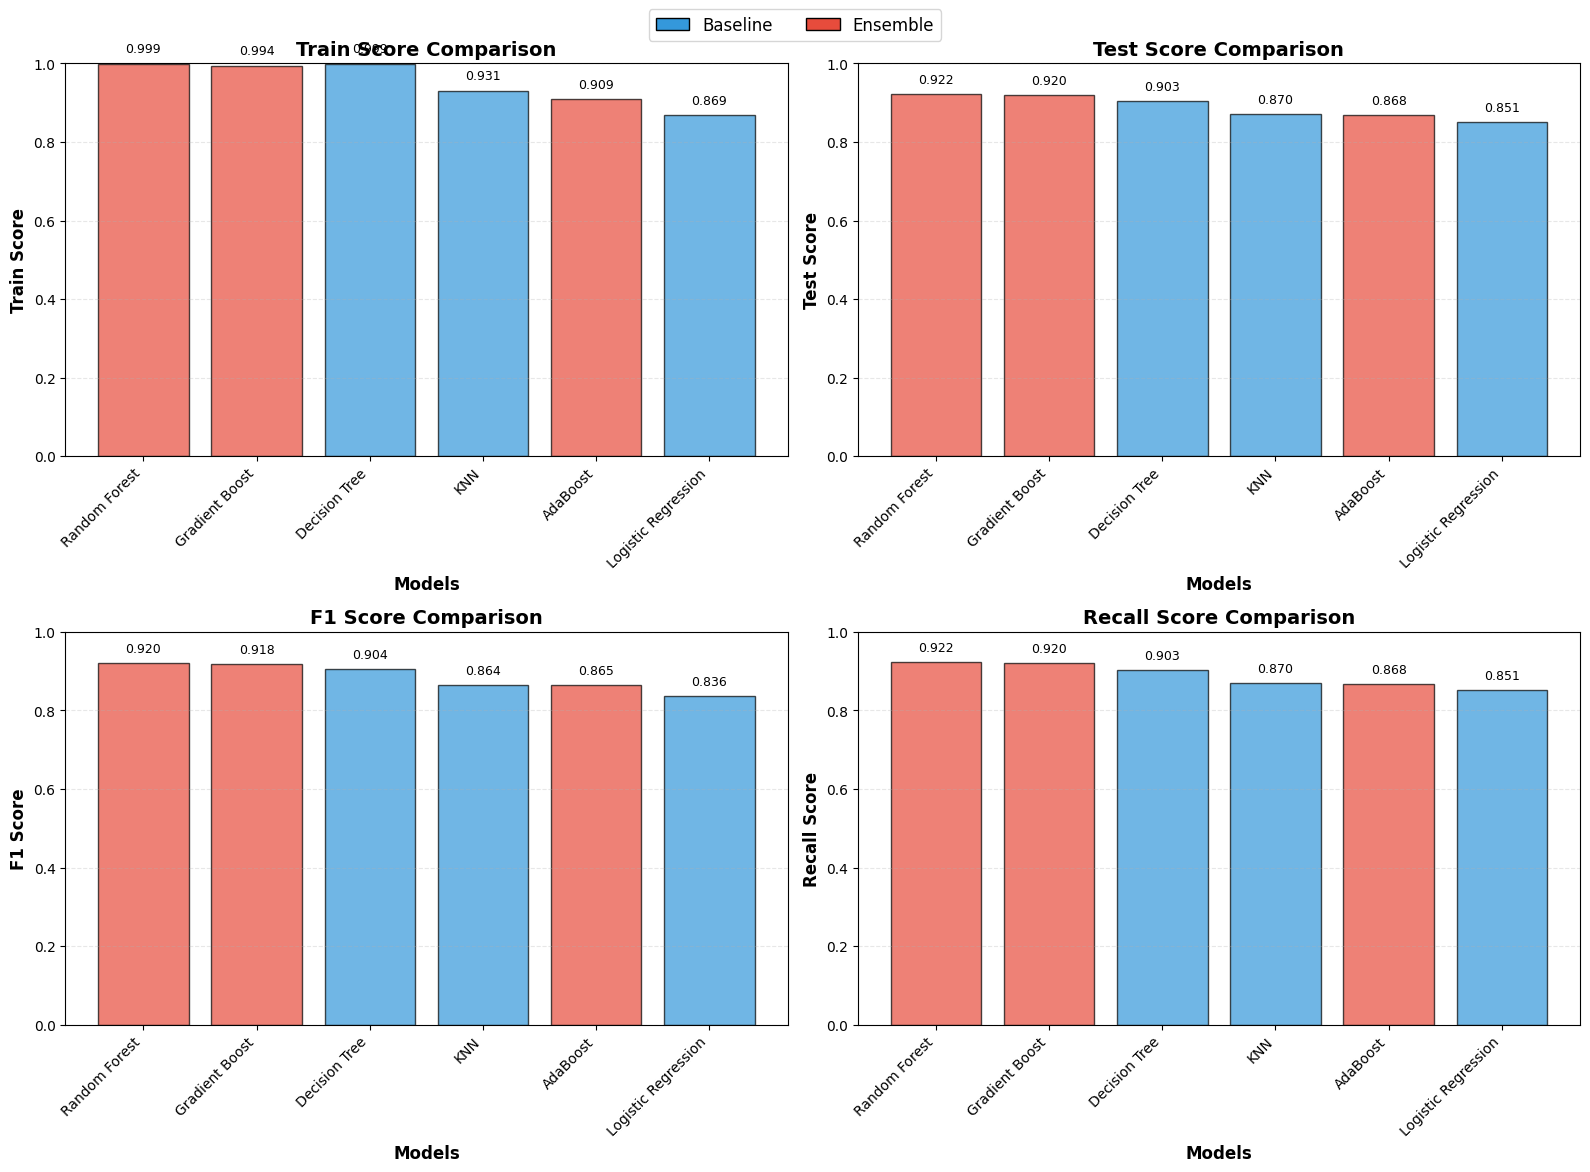

In [16]:
# Gráfico comparativo de métricas
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

metrics = ['Train Score', 'Test Score', 'F1 Score', 'Recall Score']
colors = ['#3498db', '#e74c3c']

for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    
    # Crear gráfico de barras
    x = np.arange(len(all_results))
    bar_colors = [colors[0] if t == 'Baseline' else colors[1] for t in all_results['Type']]
    
    bars = ax.bar(x, all_results[metric], color=bar_colors, alpha=0.7, edgecolor='black')
    
    # Personalización
    ax.set_xlabel('Models', fontsize=12, fontweight='bold')
    ax.set_ylabel(metric, fontsize=12, fontweight='bold')
    ax.set_title(f'{metric} Comparison', fontsize=14, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(all_results['Model'], rotation=45, ha='right')
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    ax.set_ylim([0, 1])
    
    # Añadir valores encima de las barras
    for i, v in enumerate(all_results[metric]):
        ax.text(i, v + 0.02, f'{v:.3f}', ha='center', va='bottom', fontsize=9)

# Leyenda
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=colors[0], edgecolor='black', label='Baseline'),
    Patch(facecolor=colors[1], edgecolor='black', label='Ensemble')
]
fig.legend(handles=legend_elements, loc='upper center', ncol=2, fontsize=12, 
           bbox_to_anchor=(0.5, 0.98), frameon=True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## 📈 Mejora de Ensemble sobre Baseline

In [17]:
# Calcular mejora de ensemble sobre baseline
best_baseline_score = baseline_df['Test Score'].max()
best_ensemble_score = ensemble_df['Test Score'].max()

improvement = ((best_ensemble_score - best_baseline_score) / best_baseline_score) * 100

print("📊 ANÁLISIS DE MEJORA")
print("=" * 80)
print(f"Mejor Baseline Score: {best_baseline_score:.4f}")
print(f"Mejor Ensemble Score: {best_ensemble_score:.4f}")
print(f"Mejora Absoluta: {best_ensemble_score - best_baseline_score:.4f}")
print(f"Mejora Relativa: {improvement:.2f}%")
print("\n")

if improvement > 0:
    print(f"✅ Los modelos ensemble mejoraron {improvement:.2f}% sobre baseline")
else:
    print(f"⚠️ Los modelos ensemble NO superaron al baseline")

📊 ANÁLISIS DE MEJORA
Mejor Baseline Score: 0.9031
Mejor Ensemble Score: 0.9220
Mejora Absoluta: 0.0189
Mejora Relativa: 2.09%


✅ Los modelos ensemble mejoraron 2.09% sobre baseline


## 📋 Resumen Estadístico

In [20]:
# Comparación estadística por tipo
summary = all_results.groupby('Type')[['Train Score', 'Test Score', 'F1 Score', 'Recall Score']].agg(['mean', 'std', 'max'])
print("📊 RESUMEN ESTADÍSTICO POR TIPO")
print("=" * 80)
summary.round(4)

📊 RESUMEN ESTADÍSTICO POR TIPO


Train Score                 Test Score                 F1 Score  \
                mean     std     max       mean     std     max     mean   
Type                                                                       
Baseline      0.9331  0.0651  0.9994     0.8747  0.0263  0.9031   0.8682   
Ensemble      0.9677  0.0504  0.9994     0.9031  0.0307  0.9220   0.9010   

                         Recall Score                  
             std     max         mean     std     max  
Type                                                   
Baseline  0.0343  0.9045       0.8747  0.0263  0.9031  
Ensemble  0.0313  0.9198       0.9031  0.0307  0.9220

## 💾 Guardar Resultados Finales

In [19]:
# Guardar comparación completa
all_results.to_csv(DATA_DIR / 'processed' / 'all_models_comparison.csv', index=False)
print(f"✅ Comparación completa guardada en: {DATA_DIR / 'processed' / 'all_models_comparison.csv'}")

# Guardar mejor modelo (metadata)
best_model_info = {
    'model_name': best_overall['Model'],
    'model_type': best_overall['Type'],
    'test_score': best_overall['Test Score'],
    'f1_score': best_overall['F1 Score'],
    'recall_score': best_overall['Recall Score']
}

pd.DataFrame([best_model_info]).to_csv(DATA_DIR / 'processed' / 'best_model_info.csv', index=False)
print(f"✅ Info del mejor modelo guardada en: {DATA_DIR / 'processed' / 'best_model_info.csv'}")

✅ Comparación completa guardada en: /Users/ciprian/Desktop/factoria/projects/Equipo_4_Proyecto_VII_Modelos_de_ensemble/data/processed/all_models_comparison.csv
✅ Info del mejor modelo guardada en: /Users/ciprian/Desktop/factoria/projects/Equipo_4_Proyecto_VII_Modelos_de_ensemble/data/processed/best_model_info.csv


## 📋 Conclusiones Finales

### Modelos Evaluados:
**Baseline:**
- Logistic Regression
- Decision Tree
- KNN

**Ensemble:**
- Random Forest
- Gradient Boosting
- AdaBoost

### Resultado Final:
- **Mejor Modelo:** [Completar después de ejecutar]
- **Tipo:** [Baseline/Ensemble]
- **Test Score:** [Completar]
- **Mejora sobre Baseline:** [Completar]%

### Próximos Pasos:
- [ ] Hyperparameter tuning del mejor modelo
- [ ] Cross-validation para validar robustez
- [ ] Feature importance analysis
- [ ] Guardar modelo final con pickle
- [ ] Crear notebook de deployment/inference